### 1. Import and data loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

In [2]:
df = pd.read_csv("../data/chess_games_feature.csv")
df.head()

,WhiteElo,BlackElo,ResultNumeric,EventTypeID,RatingDiff,AvgRating,WhiteIsHigherRated,WhiteRatingAdvantage,ECOID,w_material_early,...,w_castled_early,b_castled_early,w_checks_early,b_checks_early,early_checks,w_piece_activity,b_piece_activity,both_castled_early,total_captures_early,activity_diff
0,2404,2534,0,0,130,2469.0,0,-130,0,20.0,...,0.0,1.0,0.0,0.0,0.0,34.0,33.0,0,11.0,1.0
1,2752,2395,2,0,357,2573.5,1,357,0,16.0,...,0.0,0.0,0.0,1.0,1.0,27.0,27.0,0,18.0,0.0
2,2558,2685,2,0,127,2621.5,0,-127,1,22.0,...,1.0,0.0,0.0,0.0,0.0,30.0,32.0,0,14.0,-2.0
3,2514,2351,0,0,163,2432.5,1,163,0,6.0,...,0.0,0.0,0.0,2.0,2.0,21.0,23.0,0,20.0,-2.0
4,2582,2494,2,0,88,2538.0,1,88,0,18.0,...,0.0,0.0,2.0,2.0,4.0,35.0,41.0,0,17.0,-6.0


### 2. Prepare data

In [3]:
X = df.drop('ResultNumeric', axis=1)
y = df['ResultNumeric']

print(f"Features: {X.shape}")
print(f"Target: {y.shape}")

Features: (1686173, 33)
Target: (1686173,)


### 3. Train test split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,        # 20% for testing
    random_state=42,
    stratify=y
)

### 4. Train model

In [5]:
dt_model = DecisionTreeClassifier(
    max_depth=20,              # Same as Random Forest for fair comparison
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

In [6]:
start_time = time.time()

dt_model.fit(X_train, y_train)

training_time = time.time() - start_time
print(f"Training completed in {training_time:.2f} seconds ({training_time/60:.2f} minutes)")

Training completed in 26.52 seconds (0.44 minutes)


### 5. Evaluate

In [7]:
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)\n")

print("Classification Report: \n")
print(classification_report(y_test, y_pred, target_names=['Black Win', 'Draw', 'White Win']))

Accuracy: 0.5972 (59.72%)

Classification Report: 

              precision    recall  f1-score   support

   Black Win       0.59      0.68      0.63    132965
        Draw       0.57      0.33      0.41     64732
   White Win       0.61      0.65      0.63    139538

    accuracy                           0.60    337235
   macro avg       0.59      0.55      0.56    337235
weighted avg       0.59      0.60      0.59    337235



### 6. Confusion Matrix

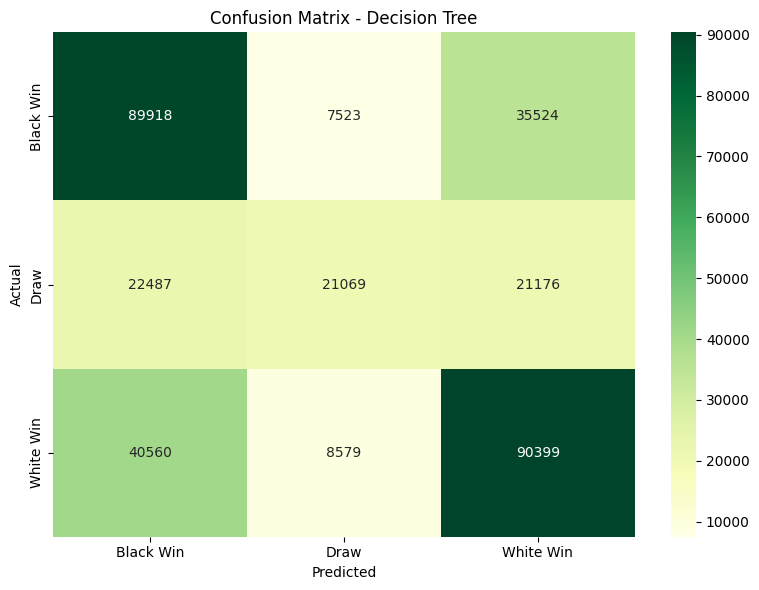

In [8]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGn',
            xticklabels=['Black Win', 'Draw', 'White Win'],
            yticklabels=['Black Win', 'Draw', 'White Win'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Decision Tree')
plt.tight_layout()
plt.show()

### 7. Feature Importance


Feature Importance:
                  Feature  Importance
10    material_diff_early    0.326427
4               AvgRating    0.139894
6    WhiteRatingAdvantage    0.104082
1                BlackElo    0.070963
3              RatingDiff    0.041319
0                WhiteElo    0.036617
32          activity_diff    0.026007
29       b_piece_activity    0.022317
8        w_material_early    0.019801
9        b_material_early    0.018849
28       w_piece_activity    0.018164
15     b_aggression_early    0.016285
16  aggression_diff_early    0.015317
2             EventTypeID    0.014431
7                   ECOID    0.014404
27           early_checks    0.011927
19            center_diff    0.010557
31   total_captures_early    0.009794
14     w_aggression_early    0.009716
26         b_checks_early    0.008385
17       w_center_control    0.008222
18       b_center_control    0.008008
25         w_checks_early    0.007747
12       b_captures_early    0.006808
11       w_captures_early    

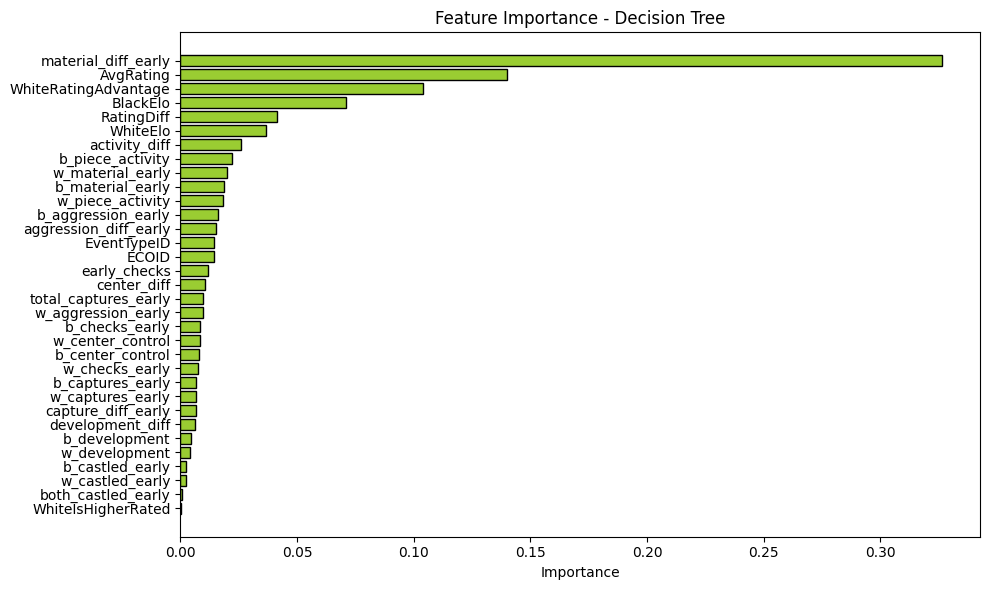

In [9]:
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(importance_df)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'],
         color='yellowgreen', edgecolor='black')
plt.xlabel('Importance')
plt.title('Feature Importance - Decision Tree')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()